In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
import pymc3 as pm
from sklearn import datasets
from sklearn import metrics
import seaborn as sns
from theano import shared
from pymc3 import  *
import arviz as az
%matplotlib inline 

In [31]:
data = datasets.fetch_california_housing()

In [32]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [33]:
print(data.target)
print(data.target.shape)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]
(20640,)


In [34]:
print(data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [35]:
df = pd.DataFrame(data.data,
				   columns=data.feature_names)
print(df.shape)
df

(20640, 8)


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

In [36]:
df['median_house_value'] = data.target
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  median_house_value  
0        -122.23               4.526  
1        -122.22               3.585  
2        -122.24               3.521  
3        -122.25               3.413  
4        -122.25               3.422  
...          ...                 ...  
20635    -121.09               0.781  
20636    -121.21               0.771  
20637    -121.22               0.923  
20638    -121.32               0.847  
20639    -121.24               0.894  

[20640 rows x 9 columns]

In [10]:
print(df.MedInc.head())

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: MedInc, dtype: float64


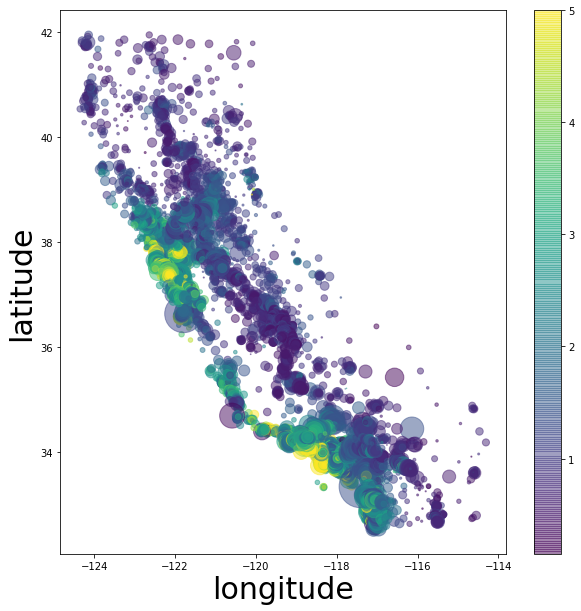

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(x=df['Longitude'],y=df['Latitude'],alpha=0.5,s=df['Population']/20,c=data.target,zorder=1)
plt.colorbar()
plt.xlabel('longitude', fontsize=30)
plt.ylabel('latitude', fontsize=30)
plt.show()

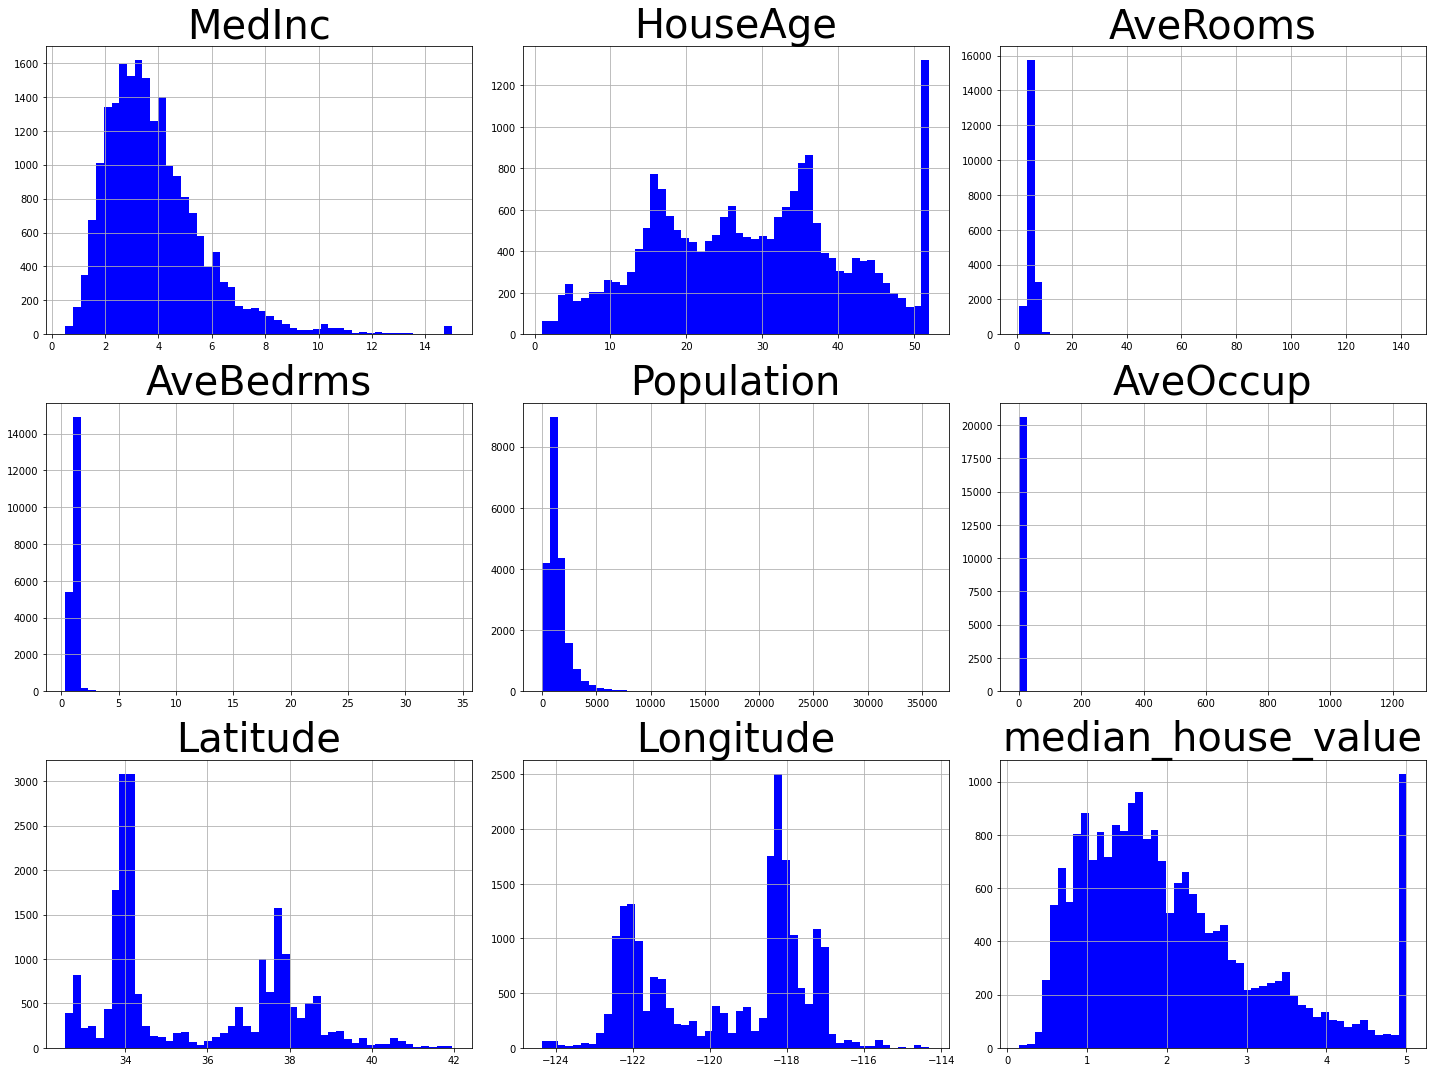

In [15]:
fig = df.hist(figsize=(20,15), bins = 50, color = 'b')
[x.title.set_size(40) for x in fig.ravel()]
plt.tight_layout()
plt.show()

In [11]:
print(df.isnull().sum())

MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
median_house_value    0
dtype: int64


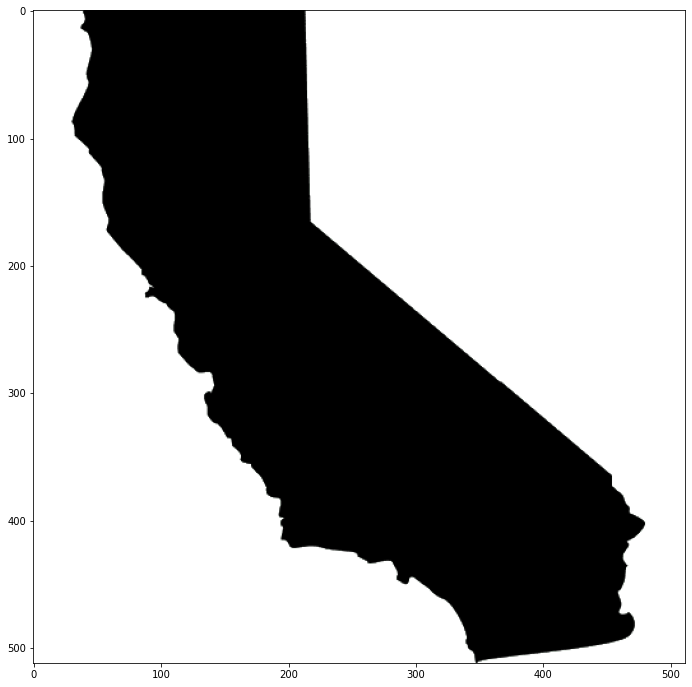

In [12]:
plt.figure(figsize=(12,12))
img=plt.imread('california.png')
plt.imshow(img,zorder=0)

In [91]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [78]:
print(X_train.shape)
print(y_train.shape)

(15480, 8)
(15480,)


In [93]:
corr = X_train.join(y_train).corr()

In [94]:
corr['median_house_value'].sort_values()

Latitude             -0.144135
Longitude            -0.045242
AveBedrms            -0.045107
AveOccup             -0.040006
Population           -0.022955
HouseAge              0.105822
AveRooms              0.146651
MedInc                0.691989
median_house_value    1.000000
Name: median_house_value, dtype: float64

<AxesSubplot:>

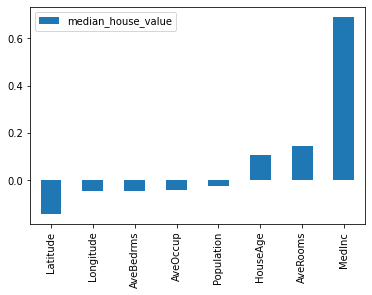

In [95]:
df_corr = pd.DataFrame(corr['median_house_value'])
df_corr.sort_values(by='median_house_value',inplace=True)
df_corr.drop(index='median_house_value',inplace=True)
df_corr.plot(kind='bar')

Sequential sampling (2 chains in 1 job)
NUTS: [sigma, coeff, intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 14 seconds.


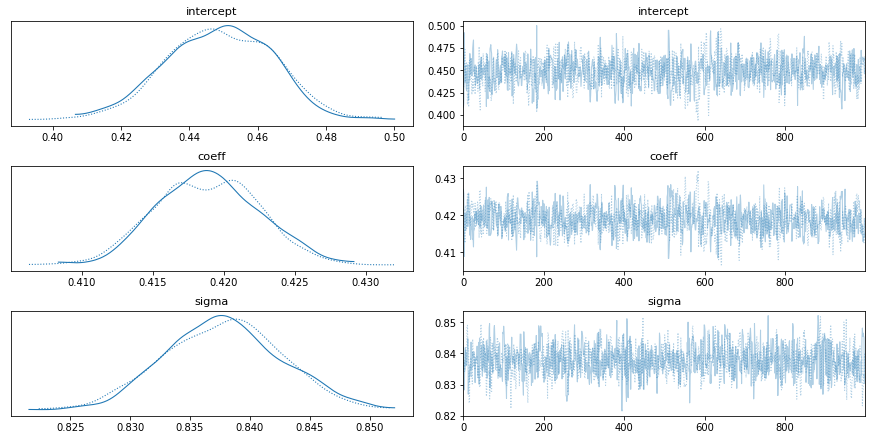

In [53]:
with pm.Model() as model:
    # Defining our priors
    intercept = pm.Normal('intercept', mu=0, sd=1.)
    coeff = pm.Normal('coeff', mu=0, sd=1.)
    sigma = pm.HalfNormal('sigma', sd=1.)

    y_est = intercept + coeff*X_train['MedInc']
    
    y = pm.Normal('y', mu=y_est, sd=sigma, observed=y_train)
    
    sampler = pm.NUTS()
    
    trace = pm.sample(1000, sampler, progressbar=True, cores=1, chains=2)
                  
    pm.traceplot(trace, ['intercept', 'coeff', 'sigma'])
    plt.show()

/home/pt18419/.local/lib/python3.6/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


(1000, 15480)
(15480,)
(15480,)


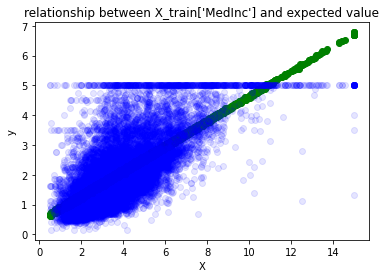

0.8378394753169555


In [55]:
with model:
    ppc = pm.sample_posterior_predictive(trace, samples=1000)
    y_pred = ppc['y']
    print(y_pred.shape)
    expected_y_pred = np.reshape(np.mean(y_pred, axis=0), [-1])
    print(expected_y_pred.shape)
    print(X_train['MedInc'].shape)
    plt.scatter(X_train['MedInc'], expected_y_pred, c='g')
    plt.scatter(X_train['MedInc'], y_train, c='b', alpha=0.1)
    plt.title("relationship between X_train['MedInc'] and expected value")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()
    mse = metrics.mean_squared_error(expected_y_pred, y_train)
    mse = np.sqrt(mse)
    print(mse)

Sequential sampling (2 chains in 1 job)
NUTS: [sigma, coeff8, coeff7, coeff6, coeff5, coeff4, coeff3, coeff2, coeff1, intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2717 seconds.


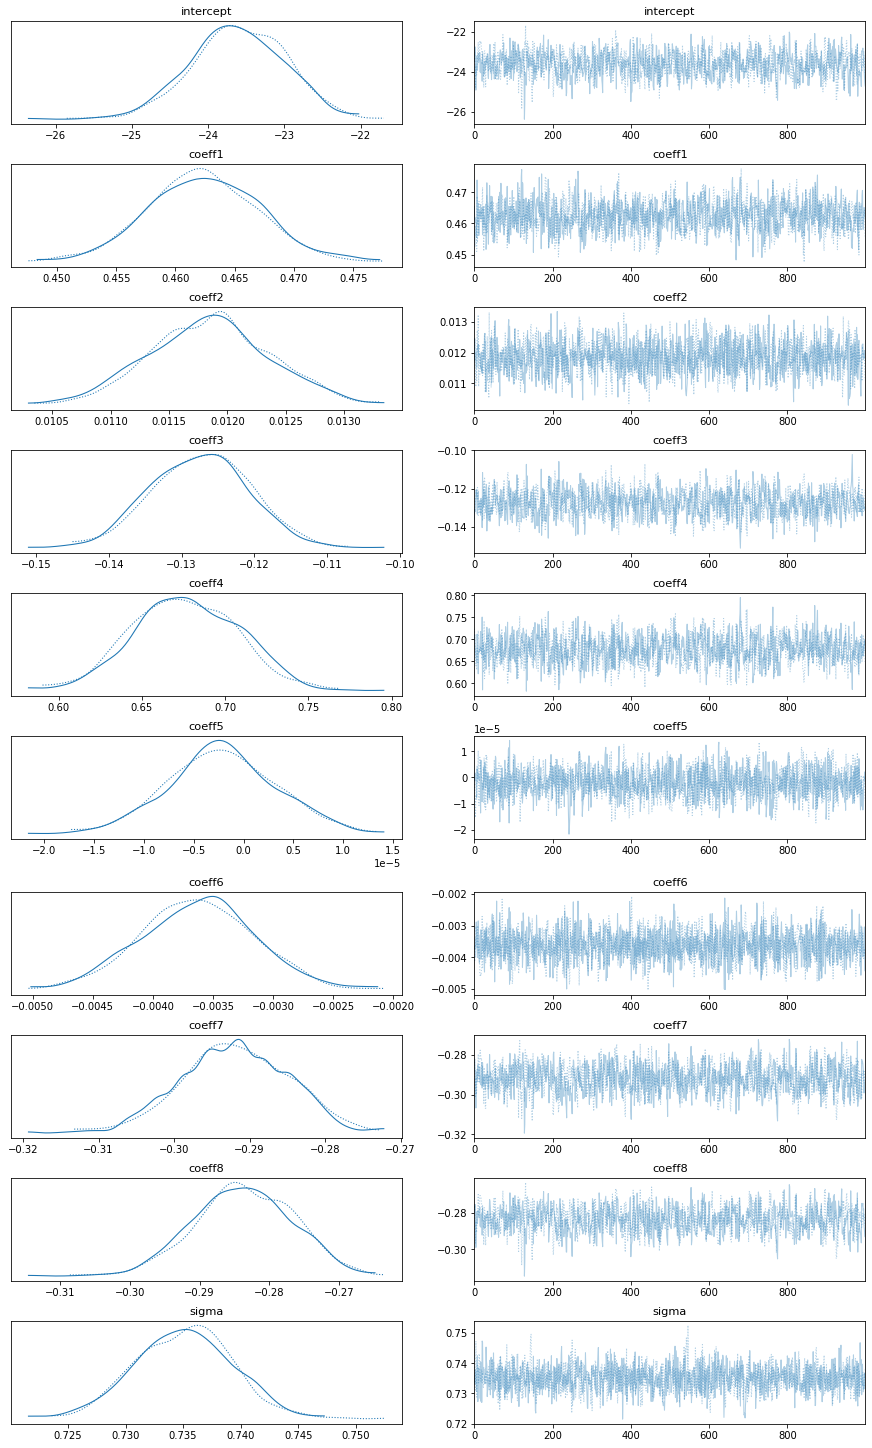

In [95]:
with pm.Model() as model4:
    # Defining our priors
    intercept = pm.Normal('intercept', mu=0, sd=1.)
    coeff1 = pm.Normal('coeff1', mu=0, sd=1.)
    coeff2 = pm.Normal('coeff2', mu=0, sd=1.)
    coeff3 = pm.Normal('coeff3', mu=0, sd=1.)
    coeff4 = pm.Normal('coeff4', mu=0, sd=1.)
    coeff5 = pm.Normal('coeff5', mu=0, sd=1.)
    coeff6 = pm.Normal('coeff6', mu=0, sd=1.)
    coeff7 = pm.Normal('coeff7', mu=0, sd=1.)
    coeff8 = pm.Normal('coeff8', mu=0, sd=1.)
    sigma = pm.HalfNormal('sigma', sd=1.)

    y_est = intercept + coeff1*X_train['MedInc'] + coeff2*X_train['HouseAge'] + coeff3*X_train['AveRooms'] + coeff4*X_train['AveBedrms'] + coeff5*X_train['Population'] + coeff6*X_train['AveOccup'] + coeff7*X_train['Latitude'] + coeff8*X_train['Longitude']
    
    y = pm.Normal('y', mu=y_est, sd=sigma, observed=y_train)
    
    sampler = pm.NUTS()
    
    trace = pm.sample(1000, sampler, progressbar=True, cores=1, chains=2)
                  
    pm.traceplot(trace, ['intercept', 'coeff1', 'coeff2', 'coeff3', 'coeff4', 'coeff5', 'coeff6', 'coeff7', 'coeff8', 'sigma'])
    plt.show()

In [96]:
with model4:
    ppc = pm.sample_posterior_predictive(trace, samples=1000)
    y_pred = ppc['y']
    print(y_pred.shape)
    expected_y_pred = np.reshape(np.mean(y_pred, axis=0), [-1])
    print(expected_y_pred.shape)
    mse = metrics.mean_squared_error(expected_y_pred, y_train)
    mse = np.sqrt(mse)
    print(mse)

/home/pt18419/.local/lib/python3.6/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


(1000, 15480)
(15480,)
0.7350330277177675


In [46]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)
print(X_std.shape)
X_std_test = scaler.transform(X_test)
print(X_std_test.shape)

(15480, 8)
(5160, 8)


Sequential sampling (2 chains in 1 job)
NUTS: [sigma, coeff, intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 7 seconds.


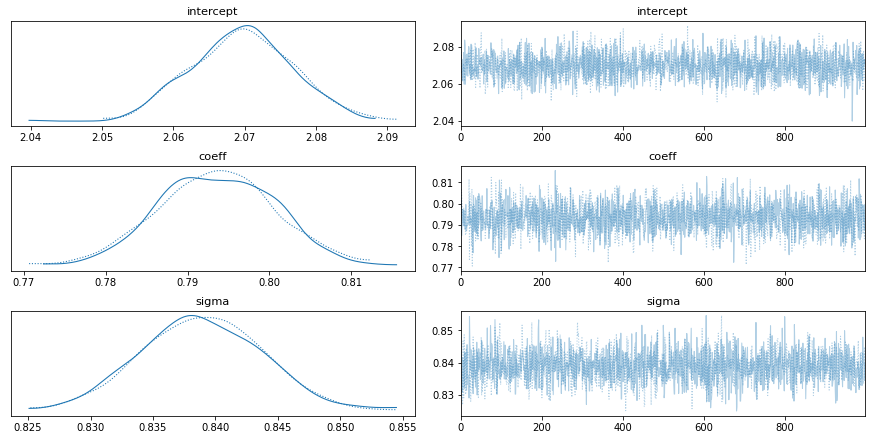

In [47]:
with pm.Model() as model2:
    # Defining our priors
    intercept = pm.Normal('intercept', mu=0, sd=1.)
    coeff = pm.Normal('coeff', mu=0, sd=1.)
    sigma = pm.HalfNormal('sigma', sd=1.)

    y_est = intercept + coeff*X_std[:, 0]
    
    y = pm.Normal('y', mu=y_est, sd=sigma, observed=y_train)
    
    sampler = pm.NUTS()
    
    trace = pm.sample(1000, sampler, progressbar=True, cores=1, chains=2)
                  
    pm.traceplot(trace, ['intercept', 'coeff', 'sigma'])
    plt.show()

/home/pt18419/.local/lib/python3.6/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


(1000, 15480)
(15480,)
(15480,)


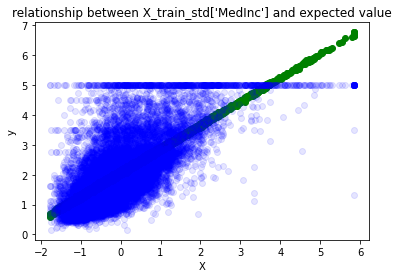

0.8394297009832921


In [48]:
with model2:
    ppc = pm.sample_posterior_predictive(trace, samples=1000)
    y_pred = ppc['y']
    print(y_pred.shape)
    expected_y_pred = np.reshape(np.mean(y_pred, axis=0), [-1])
    print(expected_y_pred.shape)
    print(X_std[:, 0].shape)
    plt.scatter(X_std[:, 0], expected_y_pred, c='g')
    plt.scatter(X_std[:, 0], y_train, c='b', alpha=0.1)
    plt.title("relationship between X_train_std['MedInc'] and expected value")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()
    mse = metrics.mean_squared_error(expected_y_pred, y_train)
    mse = np.sqrt(mse)
    print(mse)

Sequential sampling (2 chains in 1 job)
NUTS: [sigma, coeff8, coeff7, coeff6, coeff5, coeff4, coeff3, coeff2, coeff1, intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 109 seconds.


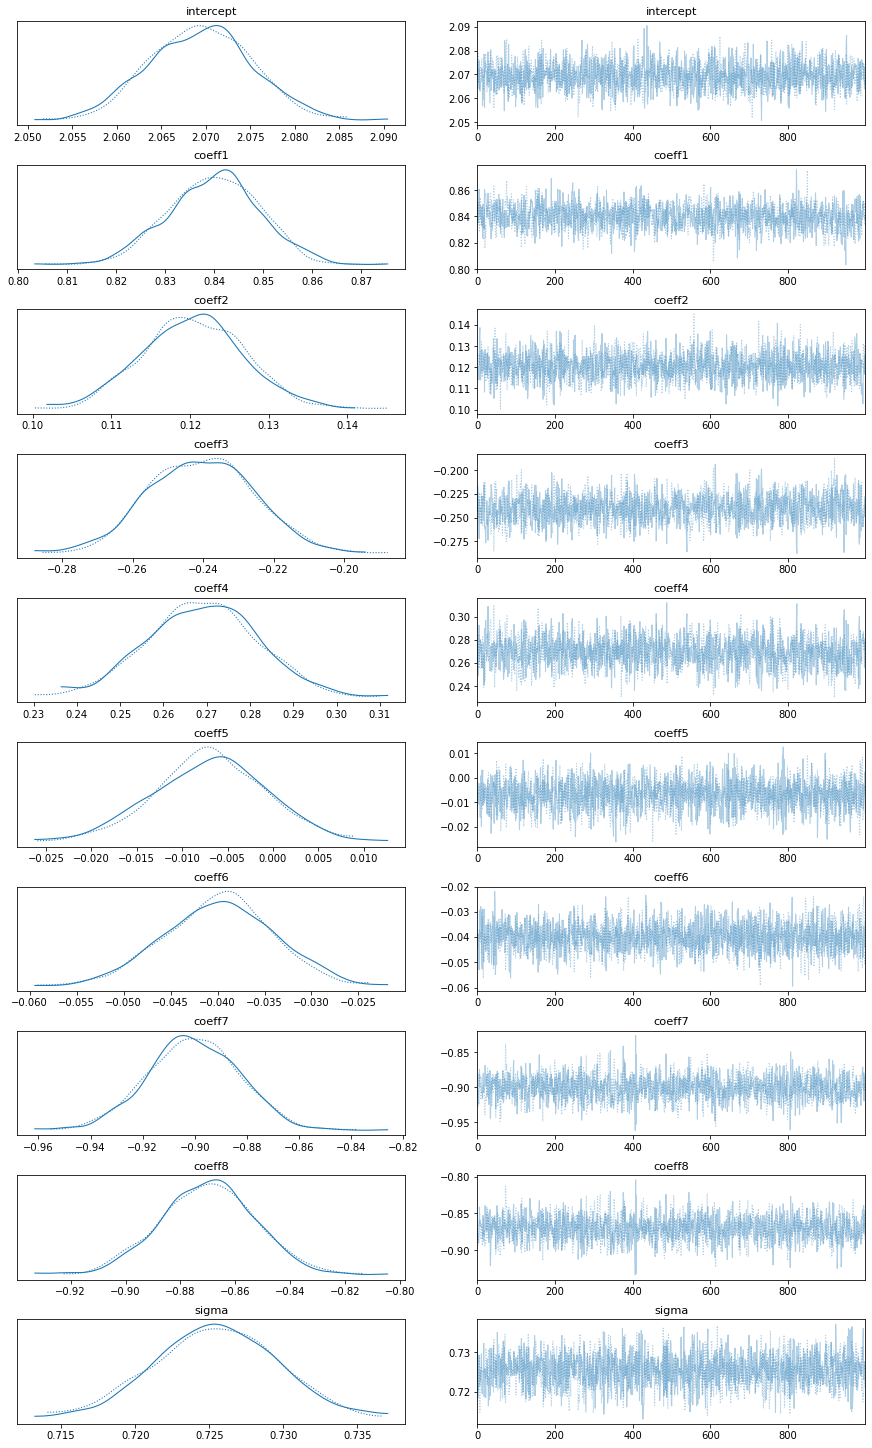

In [49]:
with pm.Model() as model3:
    # Defining our priors
    intercept = pm.Normal('intercept', mu=0, sd=1.)
    coeff1 = pm.Normal('coeff1', mu=0, sd=1.)
    coeff2 = pm.Normal('coeff2', mu=0, sd=1.)
    coeff3 = pm.Normal('coeff3', mu=0, sd=1.)
    coeff4 = pm.Normal('coeff4', mu=0, sd=1.)
    coeff5 = pm.Normal('coeff5', mu=0, sd=1.)
    coeff6 = pm.Normal('coeff6', mu=0, sd=1.)
    coeff7 = pm.Normal('coeff7', mu=0, sd=1.)
    coeff8 = pm.Normal('coeff8', mu=0, sd=1.)
    sigma = pm.HalfNormal('sigma', sd=1.)

    y_est = intercept + coeff1*X_std[:, 0] + coeff2*X_std[:, 1] + coeff3*X_std[:, 2] + coeff4*X_std[:, 3] + coeff5*X_std[:, 4] + coeff6*X_std[:, 5] + coeff7*X_std[:, 6] + coeff8*X_std[:, 7]
    
    y = pm.Normal('y', mu=y_est, sd=sigma, observed=y_train)
    
    sampler = pm.NUTS()
    
    trace = pm.sample(1000, sampler, progressbar=True, cores=1, chains=2)
                  
    pm.traceplot(trace, ['intercept', 'coeff1', 'coeff2', 'coeff3', 'coeff4', 'coeff5', 'coeff6', 'coeff7', 'coeff8', 'sigma'])
    plt.show()

In [50]:
with model3:
    ppc = pm.sample_posterior_predictive(trace, samples=1000)
    y_pred = ppc['y']
    print(y_pred.shape)
    expected_y_pred = np.reshape(np.mean(y_pred, axis=0), [-1])
    print(expected_y_pred.shape)
    mse = metrics.mean_squared_error(expected_y_pred, y_train)
    mse = np.sqrt(mse)
    print(mse)

/home/pt18419/.local/lib/python3.6/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


(1000, 15480)
(15480,)
0.7252910196127271


In [29]:
X_shared = shared(X_std)

Sequential sampling (2 chains in 1 job)
NUTS: [sigma, coeff8, coeff7, coeff6, coeff5, coeff4, coeff3, coeff2, coeff1, intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 103 seconds.


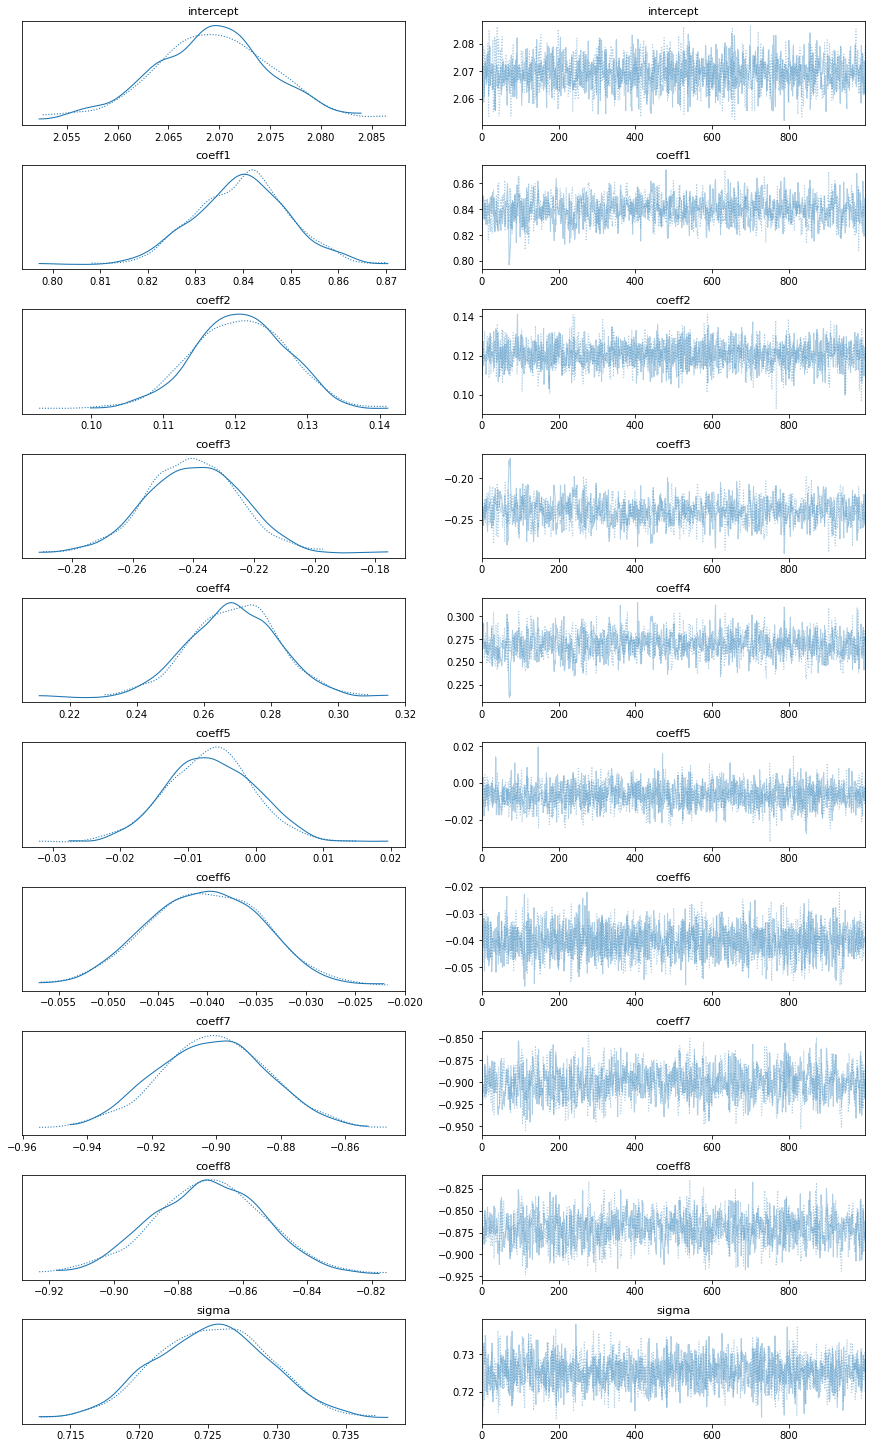

In [30]:
with pm.Model() as model5:
    # Defining our priors
    intercept = pm.Normal('intercept', mu=0, sd=1.)
    coeff1 = pm.Normal('coeff1', mu=0, sd=1.)
    coeff2 = pm.Normal('coeff2', mu=0, sd=1.)
    coeff3 = pm.Normal('coeff3', mu=0, sd=1.)
    coeff4 = pm.Normal('coeff4', mu=0, sd=1.)
    coeff5 = pm.Normal('coeff5', mu=0, sd=1.)
    coeff6 = pm.Normal('coeff6', mu=0, sd=1.)
    coeff7 = pm.Normal('coeff7', mu=0, sd=1.)
    coeff8 = pm.Normal('coeff8', mu=0, sd=1.)
    sigma = pm.HalfNormal('sigma', sd=1.)

    y_est = intercept + coeff1*X_shared[:, 0] + coeff2*X_shared[:, 1] + coeff3*X_shared[:, 2] + coeff4*X_shared[:, 3] + coeff5*X_shared[:, 4] + coeff6*X_shared[:, 5] + coeff7*X_shared[:, 6] + coeff8*X_shared[:, 7]
    
    y = pm.Normal('y', mu=y_est, sd=sigma, observed=y_train)
    
    sampler = pm.NUTS()
    
    trace = pm.sample(1000, sampler, progressbar=True, cores=1, chains=2)
                  
    pm.traceplot(trace, ['intercept', 'coeff1', 'coeff2', 'coeff3', 'coeff4', 'coeff5', 'coeff6', 'coeff7', 'coeff8', 'sigma'])
    plt.show()

In [32]:
X_shared.set_value(X_std_test)

with model5:
    ppc = pm.sample_posterior_predictive(trace, samples=1000)
    y_pred = ppc['y']
    print(y_pred.shape)
    expected_y_pred = np.reshape(np.mean(y_pred, axis=0), [-1])
    print(expected_y_pred.shape)
    mse = metrics.mean_squared_error(expected_y_pred, y_test)
    mse = np.sqrt(mse)
    print(mse)

/home/pt18419/.local/lib/python3.6/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


(1000, 5160)
(5160,)
0.7169331119704008


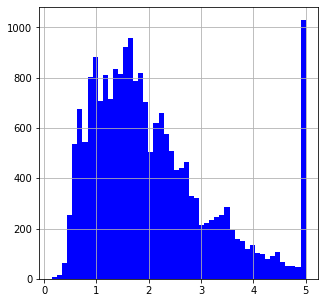

In [38]:
df['median_house_value'].hist(figsize=(5,5), bins = 50, color = 'b')
plt.show()

In [39]:
df[df['median_house_value']>4.5]['median_house_value'].value_counts().head()

5.00001    965
5.00000     27
4.75000      8
4.83300      6
4.66700      4
Name: median_house_value, dtype: int64

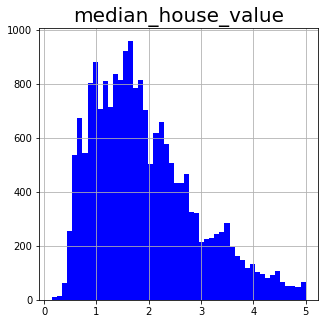

In [40]:
df=df.loc[df['median_house_value']<5.00001,:]
fig = df['median_house_value'].hist(figsize=(5,5), bins = 50, color = 'b')
fig.set_title('median_house_value')
fig.title.set_size(20)
plt.show()

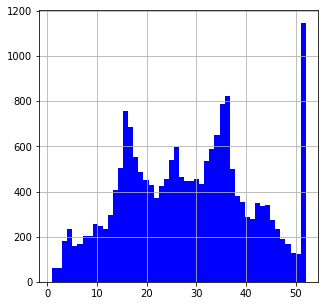

In [41]:
df['HouseAge'].hist(figsize=(5,5), bins = 50, color = 'b')
plt.show()

In [42]:
df[df['HouseAge']>47]['HouseAge'].value_counts().head()

52.0    1103
48.0     167
49.0     126
50.0     123
51.0      44
Name: HouseAge, dtype: int64

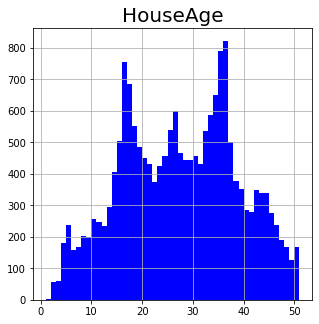

In [43]:
df=df.loc[df['HouseAge']<52,:]
fig = df['HouseAge'].hist(figsize=(5,5), bins = 50, color = 'b')
fig.set_title('HouseAge')
fig.title.set_size(20)
plt.show()

In [44]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)
print(X_std.shape)
print(y_train.shape)
X_std_test = scaler.transform(X_test)
print(X_std_test.shape)
print(y_test.shape)

(13929, 8)
(13929,)
(4643, 8)
(4643,)


INFO (theano.gof.compilelock): Refreshing lock /home/pt18419/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, coeff8, coeff7, coeff6, coeff5, coeff4, coeff3, coeff2, coeff1, intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 95 seconds.
INFO (theano.gof.compilelock): Refreshing lock /home/pt18419/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock


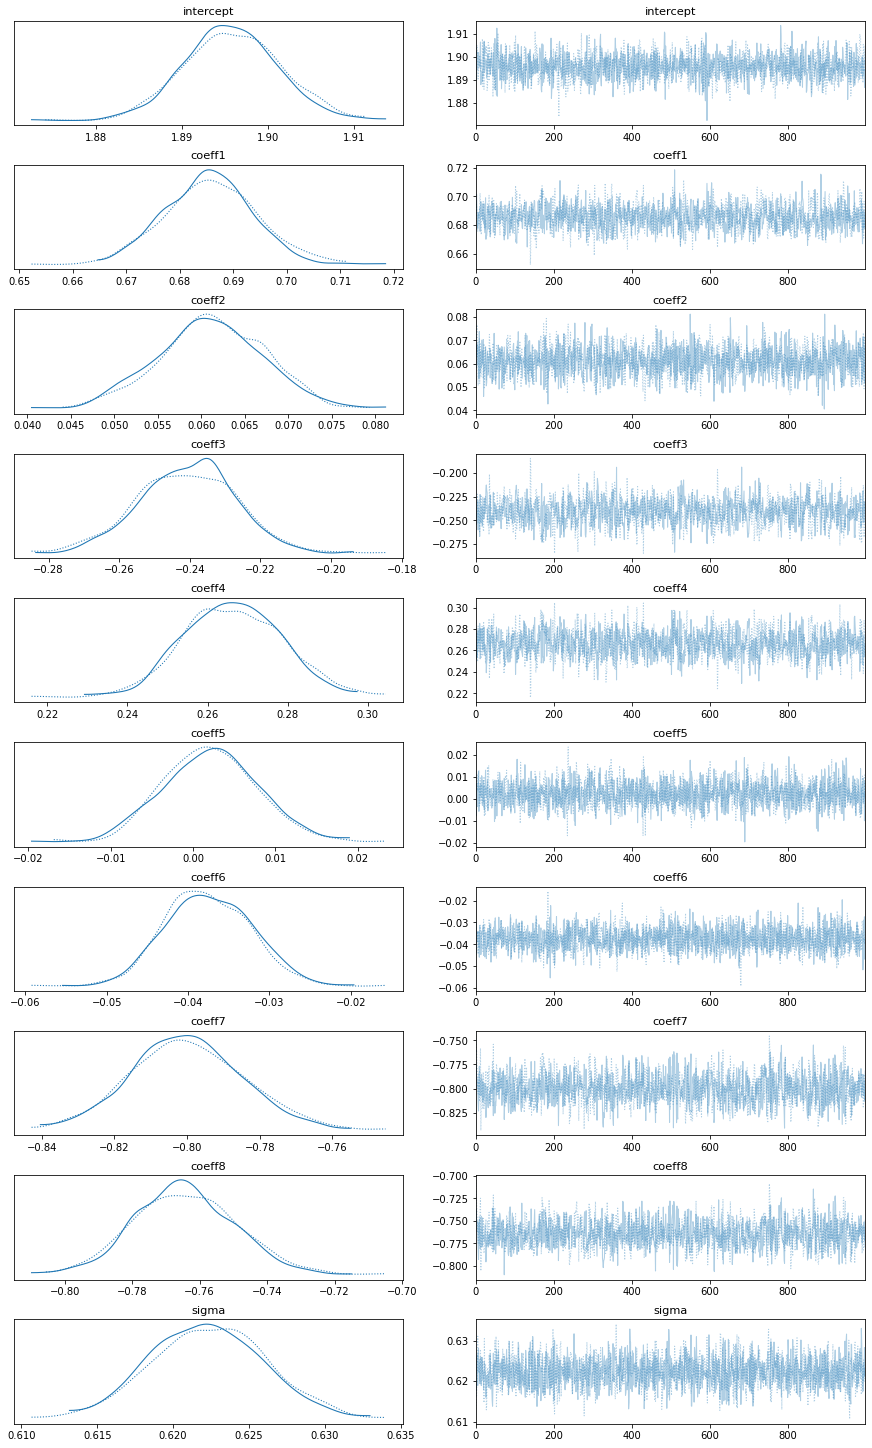

In [140]:
X_shared = shared(X_std)
with pm.Model() as model6:
    # Defining our priors
    intercept = pm.Normal('intercept', mu=0, sd=1.)
    coeff1 = pm.Normal('coeff1', mu=0, sd=1.)
    coeff2 = pm.Normal('coeff2', mu=0, sd=1.)
    coeff3 = pm.Normal('coeff3', mu=0, sd=1.)
    coeff4 = pm.Normal('coeff4', mu=0, sd=1.)
    coeff5 = pm.Normal('coeff5', mu=0, sd=1.)
    coeff6 = pm.Normal('coeff6', mu=0, sd=1.)
    coeff7 = pm.Normal('coeff7', mu=0, sd=1.)
    coeff8 = pm.Normal('coeff8', mu=0, sd=1.)
    sigma = pm.HalfNormal('sigma', sd=1.)

    y_est = intercept + coeff1*X_shared[:, 0] + coeff2*X_shared[:, 1] + coeff3*X_shared[:, 2] + coeff4*X_shared[:, 3] + coeff5*X_shared[:, 4] + coeff6*X_shared[:, 5] + coeff7*X_shared[:, 6] + coeff8*X_shared[:, 7]
    
    y = pm.Normal('y', mu=y_est, sd=sigma, observed=y_train)
    
    sampler = pm.NUTS()
    
    trace = pm.sample(1000, sampler, progressbar=True, cores=1, chains=2)
                  
    pm.traceplot(trace, ['intercept', 'coeff1', 'coeff2', 'coeff3', 'coeff4', 'coeff5', 'coeff6', 'coeff7', 'coeff8', 'sigma'])
    plt.show()

In [141]:
with model6:
    ppc = pm.sample_posterior_predictive(trace, samples=1000)
    y_pred = ppc['y']
    print(y_pred.shape)
    expected_y_pred = np.reshape(np.mean(y_pred, axis=0), [-1])
    print(expected_y_pred.shape)
    mse = metrics.mean_squared_error(expected_y_pred, y_train)
    mse = np.sqrt(mse)
    print(mse)

X_shared.set_value(X_std_test)

with model6:
    ppc = pm.sample_posterior_predictive(trace, samples=1000)
    y_pred = ppc['y']
    print(y_pred.shape)
    expected_y_pred = np.reshape(np.mean(y_pred, axis=0), [-1])
    print(expected_y_pred.shape)
    mse = metrics.mean_squared_error(expected_y_pred, y_test)
    mse = np.sqrt(mse)
    print(mse)

/home/pt18419/.local/lib/python3.6/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


(1000, 13929)
(13929,)
0.6220235743451806


/home/pt18419/.local/lib/python3.6/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


(1000, 4643)
(4643,)
0.6210769392404968


In [69]:
from scipy.stats import anderson

In [70]:
print(anderson(new_df['median_house_value']))

AndersonResult(statistic=264.0611347054328, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


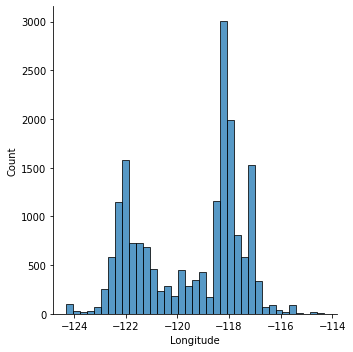

In [154]:
sns.displot(df['Longitude'])

Text(0, 0.5, 'y')

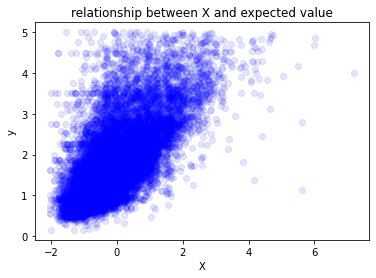

In [172]:
plt.scatter(X_std[:, 0], y_train, c='b', alpha=0.1)
plt.title("relationship between X and expected value")
plt.xlabel("X")
plt.ylabel("y")

Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sigma, coeff8, coeff7, coeff6, coeff5, coeff4, coeff3, coeff2, coeff1, intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 53 seconds.
INFO (theano.gof.compilelock): Refreshing lock /home/pt18419/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock


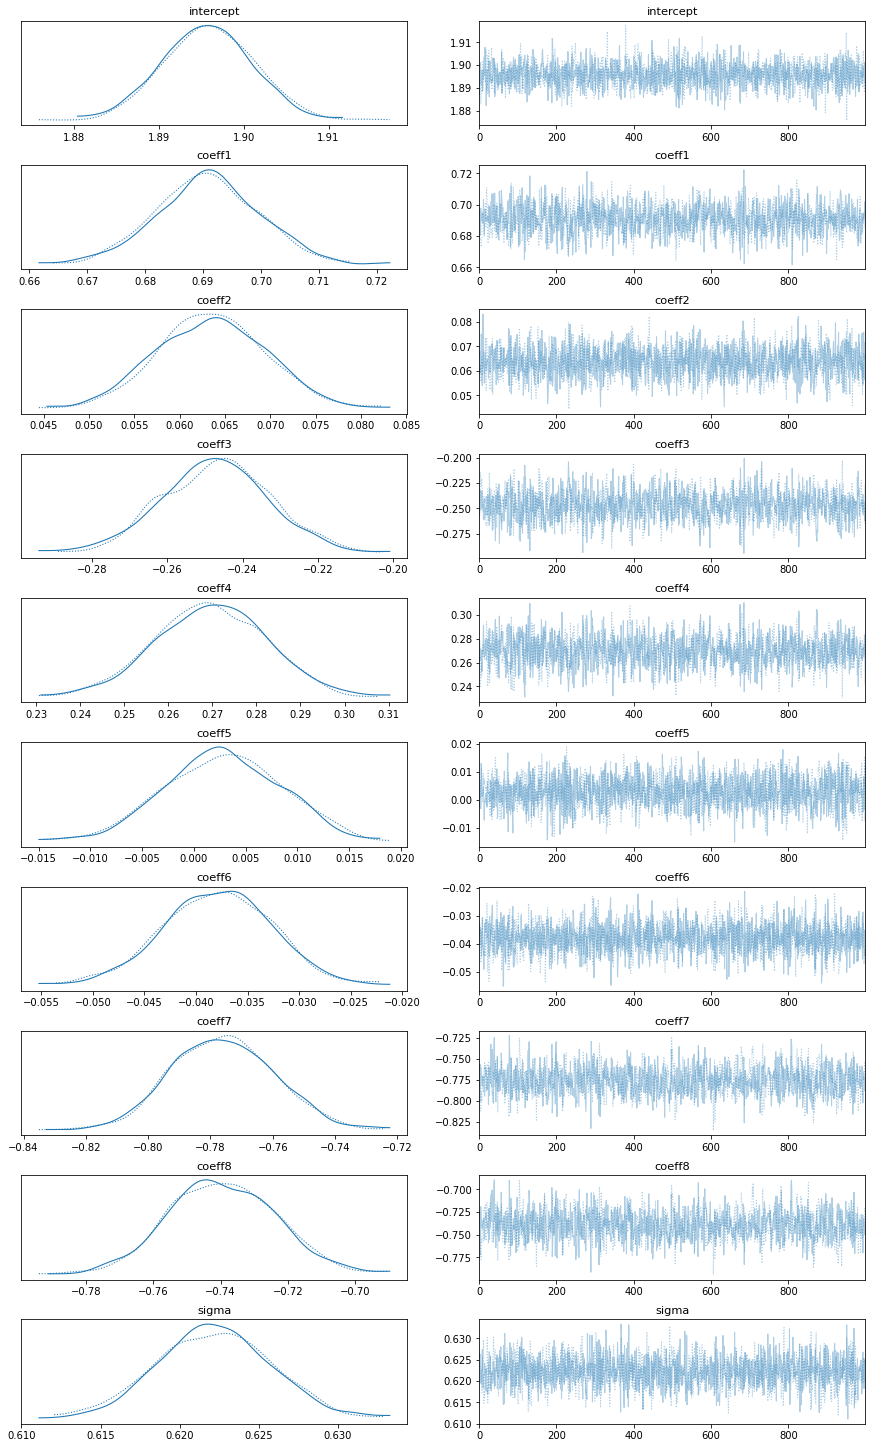

In [163]:
X_shared = shared(X_std)
with pm.Model() as model7:
    # Defining our priors
    intercept = pm.Normal('intercept', mu=0, sd=1.)
    coeff1 = pm.Normal('coeff1', mu=0, sd=1.)
    coeff2 = pm.Uniform('coeff2')
    coeff3 = pm.Normal('coeff3', mu=0, sd=1.)
    coeff4 = pm.Normal('coeff4', mu=0, sd=1.)
    coeff5 = pm.Normal('coeff5', mu=0, sd=1.)
    coeff6 = pm.Normal('coeff6', mu=0, sd=1.)
    coeff7 = pm.Normal('coeff7', mu=0, sd=1.)
    w = np.array([.2, .8])
    mu = np.array([.3, .5])
    sd = np.array([.1, .1])
    coeff8 = pm.NormalMixture('coeff8', w=w, mu=mu, sd=sd)
    sigma = pm.HalfNormal('sigma', sd=1.)

    y_est = intercept + coeff1*X_shared[:, 0] + coeff2*X_shared[:, 1] + coeff3*X_shared[:, 2] + coeff4*X_shared[:, 3] + coeff5*X_shared[:, 4] + coeff6*X_shared[:, 5] + coeff7*X_shared[:, 6] + coeff8*X_shared[:, 7]
    
    y = pm.Normal('y', mu=y_est, sd=sigma, observed=y_train)
    
    sampler = pm.NUTS()
    
    trace = pm.sample(1000, sampler, progressbar=True, cores=4, chains=2)
                  
    pm.traceplot(trace, ['intercept', 'coeff1', 'coeff2', 'coeff3', 'coeff4', 'coeff5', 'coeff6', 'coeff7', 'coeff8', 'sigma'])
    plt.show()

In [165]:
with model7:
    ppc = pm.sample_posterior_predictive(trace, samples=1000)
    y_pred = ppc['y']
    print(y_pred.shape)
    expected_y_pred = np.reshape(np.mean(y_pred, axis=0), [-1])
    print(expected_y_pred.shape)
    mse = metrics.mean_squared_error(expected_y_pred, y_train)
    mse = np.sqrt(mse)
    print(mse)

X_shared.set_value(X_std_test)

with model7:
    ppc = pm.sample_posterior_predictive(trace, samples=1000)
    y_pred = ppc['y']
    print(y_pred.shape)
    expected_y_pred = np.reshape(np.mean(y_pred, axis=0), [-1])
    print(expected_y_pred.shape)
    mse = metrics.mean_squared_error(expected_y_pred, y_test)
    mse = np.sqrt(mse)
    print(mse)

/home/pt18419/.local/lib/python3.6/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


(1000, 13929)
(13929,)
0.622385129583781


/home/pt18419/.local/lib/python3.6/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


(1000, 4643)
(4643,)
0.6211974794018376


In [46]:
new_df = df
new_df['bedroomsvsrooms']=df['AveBedrms']/df['AveRooms']

Text(0, 0.5, 'y')

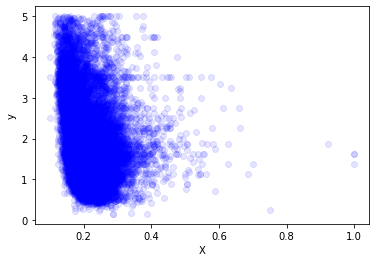

In [47]:
plt.scatter(new_df['bedroomsvsrooms'], new_df['median_house_value'], c='b', alpha=0.1)
plt.xlabel("X")
plt.ylabel("y")

In [48]:
new_df['roomsvsoccupancy']=df['AveRooms']/df['AveOccup']

Text(0, 0.5, 'y')

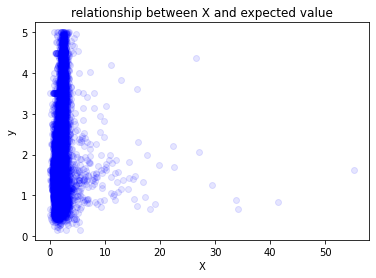

In [49]:
plt.scatter(new_df['roomsvsoccupancy'], new_df['median_house_value'], c='b', alpha=0.1)
plt.title("relationship between X and expected value")
plt.xlabel("X")
plt.ylabel("y")

In [50]:
new_df = new_df.drop('AveRooms', axis=1)
new_df = new_df.drop('AveBedrms', axis=1)
new_df = new_df.drop('AveOccup', axis=1)

In [51]:
new_df

MedInc  HouseAge  Population  Latitude  Longitude  median_house_value  \
0      8.3252      41.0       322.0     37.88    -122.23               4.526   
1      8.3014      21.0      2401.0     37.86    -122.22               3.585   
8      2.0804      42.0      1206.0     37.84    -122.26               2.267   
15     2.1250      50.0       697.0     37.85    -122.26               1.400   
18     1.9911      50.0       990.0     37.84    -122.26               1.587   
...       ...       ...         ...       ...        ...                 ...   
20635  1.5603      25.0       845.0     39.48    -121.09               0.781   
20636  2.5568      18.0       356.0     39.49    -121.21               0.771   
20637  1.7000      17.0      1007.0     39.43    -121.22               0.923   
20638  1.8672      18.0       741.0     39.43    -121.32               0.847   
20639  2.3886      16.0      1387.0     39.37    -121.24               0.894   

       bedroomsvsrooms  roomsvsoccupancy  
0             0.146591          2.732919  
1             0.155797          2.956685  
8             0.260274          2.118574  
15            0.252679          1.606887  
18            0.203216          2.261616  
...                ...               ...  
20635         0.224625          1.970414  
20636         0.215208          1.957865  
20637         0.215173          2.238332  
20638         0.219892          2.510121  
20639         0.221185          2.007931  

[18572 rows x 8 columns]

In [52]:
X = new_df.drop('median_house_value', axis=1)
y = new_df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [53]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)
print(X_std.shape)
print(y_train.shape)
X_std_test = scaler.fit_transform(X_test)
print(X_std_test.shape)
print(y_test.shape)

(13929, 7)
(13929,)
(4643, 7)
(4643,)


Sequential sampling (2 chains in 1 job)
NUTS: [sigma, coeff, intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 6 seconds.


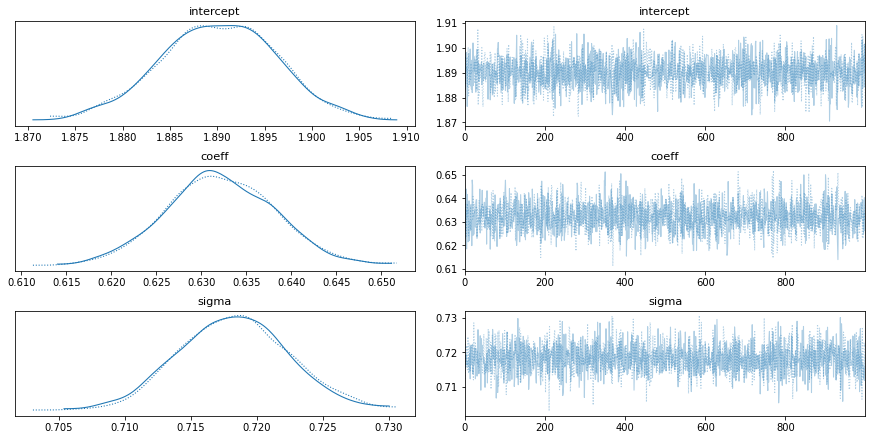

In [70]:
with pm.Model() as model12:
    # Defining our priors
    intercept = pm.Normal('intercept', mu=0, sd=1.)
    coeff = pm.Normal('coeff', mu=0, sd=1.)
    sigma = pm.HalfNormal('sigma', sd=1.)

    y_est = intercept + coeff*X_std[:, 0]
    
    y = pm.Normal('y', mu=y_est, sd=sigma, observed=y_train)
    
    sampler = pm.NUTS()
    
    trace = pm.sample(1000, sampler, progressbar=True, cores=1, chains=2)
                  
    pm.traceplot(trace, ['intercept', 'coeff', 'sigma'])
    plt.show()

/home/pt18419/.local/lib/python3.6/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


(1000, 13929)
(13929,)
(13929,)


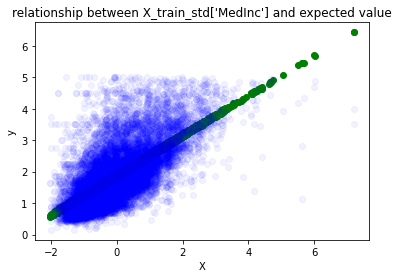

0.7182416844458155


In [71]:
with model12:
    ppc = pm.sample_posterior_predictive(trace, samples=1000)
    y_pred = ppc['y']
    print(y_pred.shape)
    expected_y_pred = np.reshape(np.mean(y_pred, axis=0), [-1])
    print(expected_y_pred.shape)
    print(X_std[:, 0].shape)
    plt.scatter(X_std[:, 0], expected_y_pred, c='g')
    plt.scatter(X_std[:, 0], y_train, c='b', alpha=0.05)
    plt.title("relationship between X_train_std['MedInc'] and expected value")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()
    mse = metrics.mean_squared_error(expected_y_pred, y_train)
    mse = np.sqrt(mse)
    print(mse)

Sequential sampling (2 chains in 1 job)
NUTS: [sigma, coeff, intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 6 seconds.


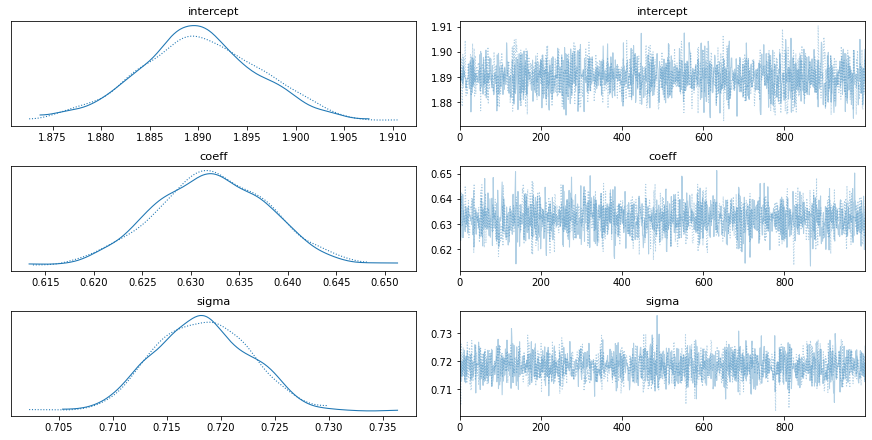

In [72]:
X_shared = shared(X_std)
with pm.Model() as model13:
    # Defining our priors
    intercept = pm.Normal('intercept', mu=0, sd=1.)
    coeff = pm.Normal('coeff', mu=0, sd=1.)
    sigma = pm.HalfNormal('sigma', sd=1.)

    y_est = intercept + coeff*X_shared[:, 0]
    
    y = pm.Normal('y', mu=y_est, sd=sigma, observed=y_train)
    
    sampler = pm.NUTS()
    
    trace = pm.sample(1000, sampler, progressbar=True, cores=1, chains=2)
                  
    pm.traceplot(trace, ['intercept', 'coeff', 'sigma'])
    plt.show()

In [74]:
with model13:
    ppc = pm.sample_posterior_predictive(trace, samples=1000)
    y_pred = ppc['y']
    expected_y_pred = np.reshape(np.mean(y_pred, axis=0), [-1])
    mse = metrics.mean_squared_error(expected_y_pred, y_train)
    mse = np.sqrt(mse)
    print(mse)

X_shared.set_value(X_std_test)

with model13:
    ppc = pm.sample_posterior_predictive(trace, samples=1000)
    y_pred = ppc['y']
    expected_y_pred = np.reshape(np.mean(y_pred, axis=0), [-1])
    mse = metrics.mean_squared_error(expected_y_pred, y_test)
    mse = np.sqrt(mse)
    print(mse)

/home/pt18419/.local/lib/python3.6/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


0.7186318187661613


/home/pt18419/.local/lib/python3.6/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


0.7214675980192009


Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sigma, coeff7, coeff6, coeff5, coeff4, coeff3, coeff2, coeff1, intercept]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 72 seconds.


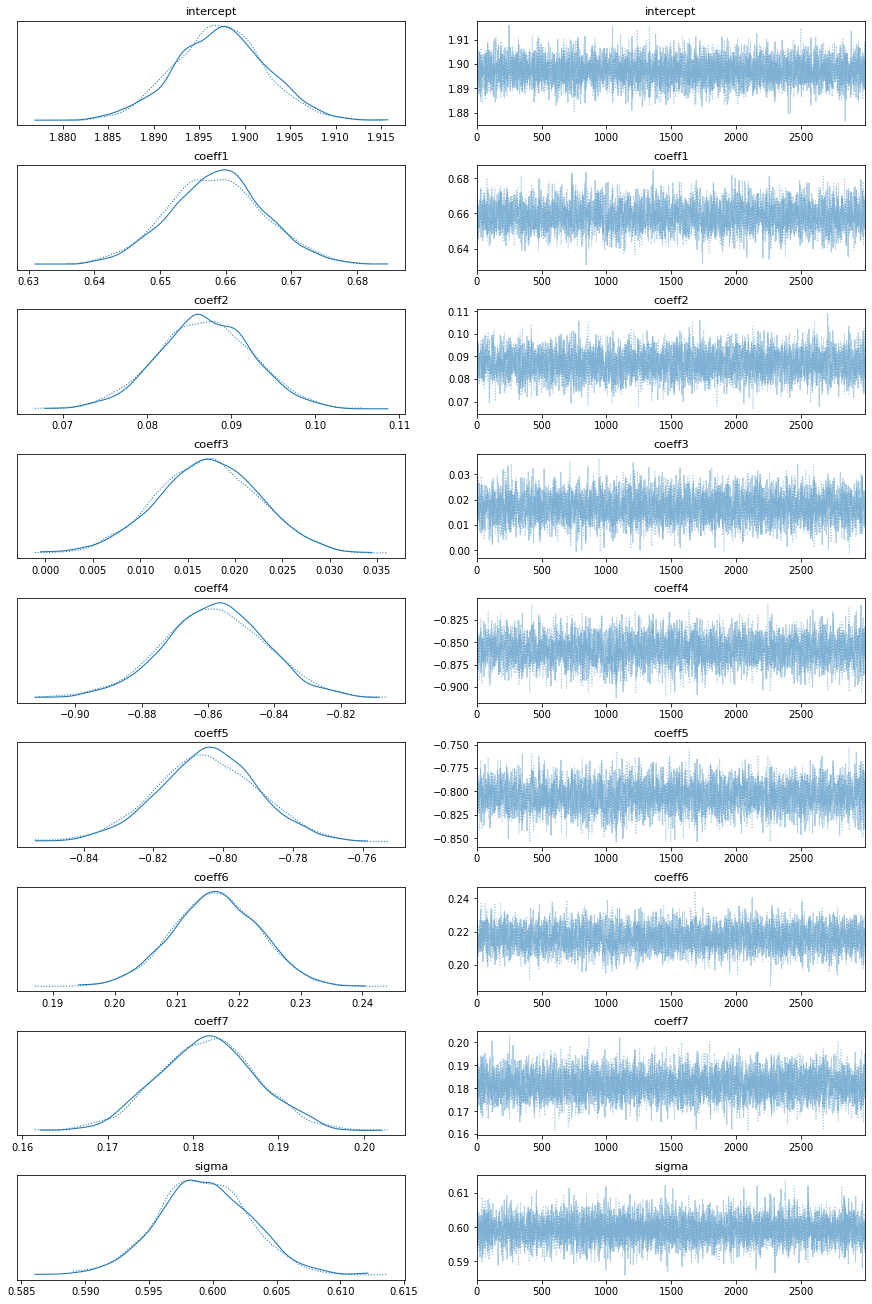

In [25]:
X_shared = shared(X_std)
with pm.Model() as model8:
    # Defining our priors
    intercept = pm.Normal('intercept', mu=0, sd=1.)
    coeff1 = pm.Normal('coeff1', mu=0, sd=10)
    coeff2 = pm.Normal('coeff2', mu=0, sd=10)
    coeff3 = pm.Normal('coeff3', mu=0, sd=10)
    w1 = np.array([.5, .5])
    mu1 = np.array([-1, 1])
    sd1 = np.array([.1, .1])
    coeff4 = pm.NormalMixture('coeff4', w=w1, mu=mu1, sd=sd1)
    w2 = np.array([.5, .5])
    mu2 = np.array([-1.5, 1])
    sd2 = np.array([.1, .1])
    coeff5 = pm.NormalMixture('coeff5', w=w2, mu=mu2, sd=sd2)
    coeff6 = pm.Normal('coeff6', mu=0, sd=10)
    coeff7 = pm.Normal('coeff7', mu=0, sd=10)
    sigma = pm.Gamma('sigma', alpha=2, beta=1)

    y_est = intercept + coeff1*X_shared[:, 0] + coeff2*X_shared[:, 1] + coeff3*X_shared[:, 2] + coeff4*X_shared[:, 3] + coeff5*X_shared[:, 4] + coeff6*X_shared[:, 5] + coeff7*X_shared[:, 6]
    
    y = pm.Normal('y', mu=y_est, sd=sigma, observed=y_train)
    
    sampler = pm.NUTS()
    
    trace = pm.sample(3000, sampler, progressbar=True, cores=4, chains=2)
                  
    pm.traceplot(trace, ['intercept', 'coeff1', 'coeff2', 'coeff3', 'coeff4', 'coeff5', 'coeff6', 'coeff7', 'sigma'])
    plt.show()

In [27]:
X_shared.set_value(X_std_test)
print(X_std.shape)
print(X_std_test.shape)
with model8:
    ppc = pm.sample_posterior_predictive(trace, samples=3000)
    y_pred = ppc['y']
    print(y_pred.shape)
    expected_y_pred = np.reshape(np.mean(y_pred, axis=0), [-1])
    print(expected_y_pred.shape)
    mse = metrics.mean_squared_error(expected_y_pred, y_test)
    mse = np.sqrt(mse)
    print(mse)

(13929, 7)
(4643, 7)


/home/pt18419/.local/lib/python3.6/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


(3000, 4643)
(4643,)
0.5998209958790347


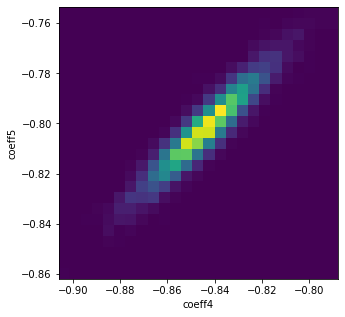

In [25]:
with model8:
    plt.figure(figsize=(5, 5))
    plt.hist2d(trace['coeff4'], trace['coeff5'], 25)
    plt.xlabel('coeff4')
    plt.ylabel('coeff5')
    plt.show()

Text(0, 0.5, 'y')

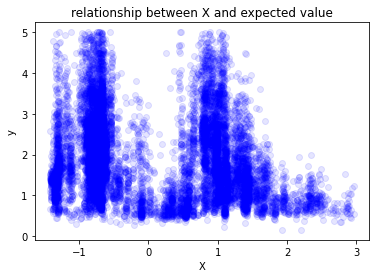

In [221]:
plt.scatter(X_std[:, 3], y_train, c='b', alpha=0.1)
plt.title("relationship between X and expected value")
plt.xlabel("X")
plt.ylabel("y")

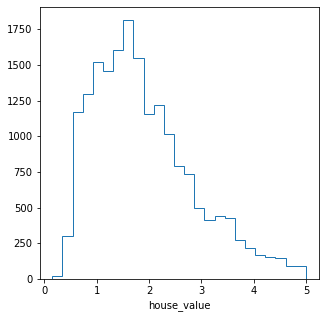

In [27]:
plt.figure(figsize=(5, 5))
plt.hist(new_df['median_house_value'], 25, histtype='step')
plt.xlabel('house_value')
plt.show()

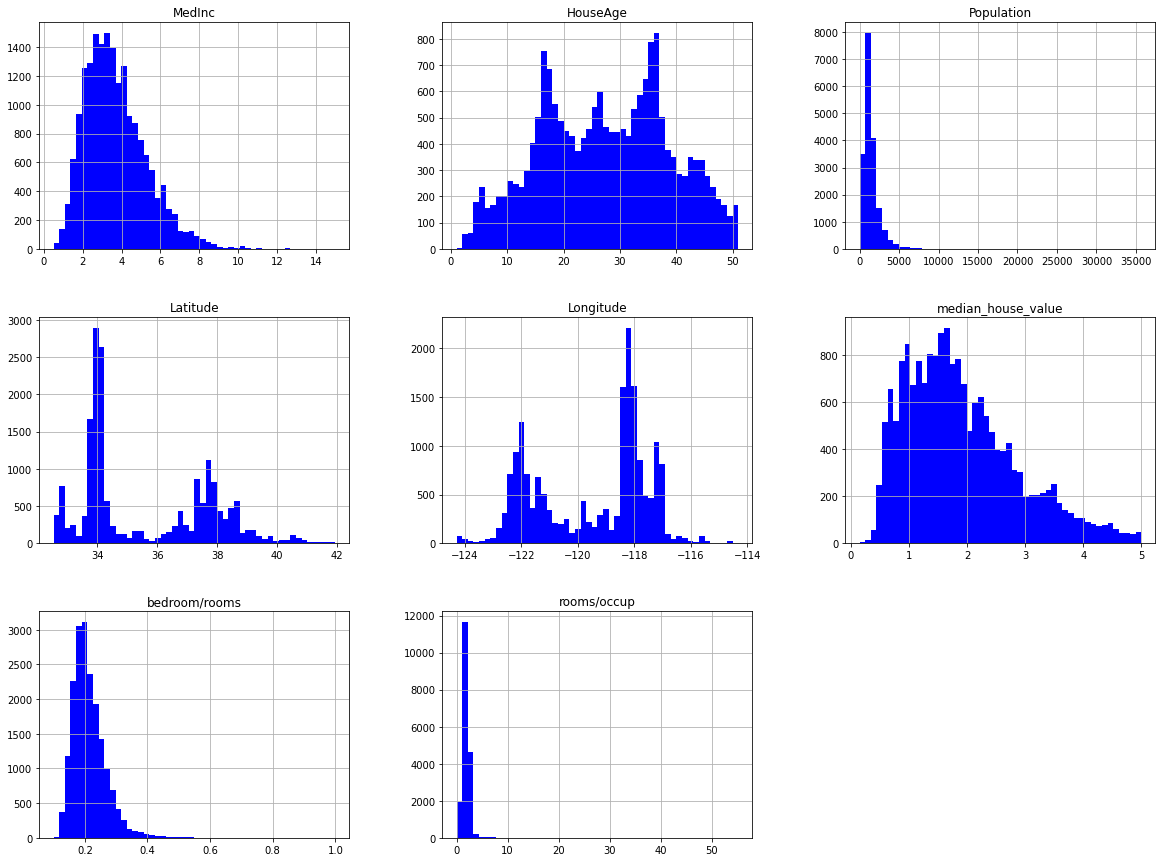

In [30]:
new_df.hist(figsize=(20,15), bins = 50, color = 'b')
plt.show()

Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [rooms/occup]
>Metropolis: [bedrooms/rooms]
>Metropolis: [Longitude]
>Metropolis: [Latitude]
>Metropolis: [Population]
>Metropolis: [HouseAge]
>Metropolis: [MedInc]
>Metropolis: [intercept]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 23 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


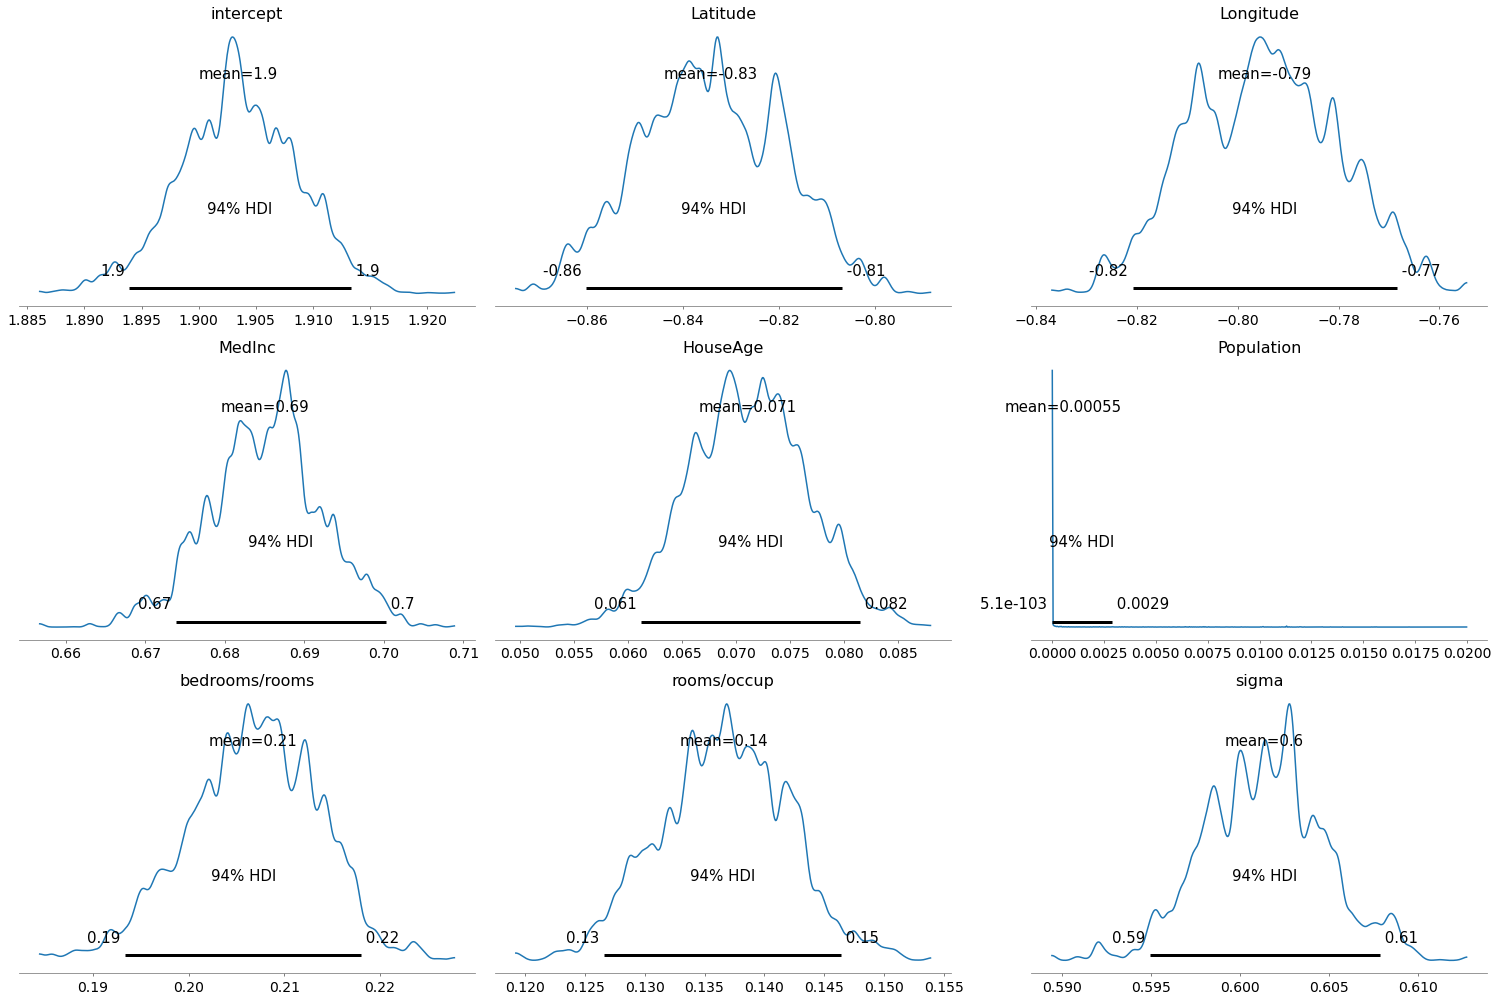

Variable: intercept       Mean weight in model: 1.9035
Variable: MedInc_log__    Mean weight in model: -0.3783
Variable: HouseAge_interval__ Mean weight in model: -6.7398
Variable: Population_log__ Mean weight in model: -79.6901
Variable: Latitude        Mean weight in model: -0.8341
Variable: Longitude       Mean weight in model: -0.7947
Variable: bedrooms/rooms_log__ Mean weight in model: -1.5767
Variable: rooms/occup_log__ Mean weight in model: -1.9915
Variable: sigma_log__     Mean weight in model: -0.5086
Variable: MedInc          Mean weight in model: 0.6851
Variable: HouseAge        Mean weight in model: 0.0711
Variable: Population      Mean weight in model: 0.0005
Variable: bedrooms/rooms  Mean weight in model: 0.2068
Variable: rooms/occup     Mean weight in model: 0.1366
Variable: sigma           Mean weight in model: 0.6013


In [130]:
X_shared = shared(X_std)
with pm.Model() as model8:
    # Defining our priors
    intercept = pm.Normal('intercept', mu=0, sd=1)
    coeff1 = pm.Gamma('MedInc', alpha=3, mu=0.1, sd=1)
    coeff2 = pm.Uniform('HouseAge', lower=0, upper=60)
    coeff3 = pm.Gamma('Population', alpha=2, mu=0.1, sd=1)
    w1 = np.array([.5, .5])
    mu1 = np.array([.1, .1])
    sd1 = np.array([1, 1])
    coeff4 = pm.NormalMixture('Latitude', w=w1, mu=mu1, sd=sd1)
    w2 = np.array([.5, .5])
    mu2 = np.array([.1, .1])
    sd2 = np.array([1, 1])
    coeff5 = pm.NormalMixture('Longitude', w=w2, mu=mu2, sd=sd2)
    coeff6 = pm.Gamma('bedrooms/rooms', alpha=2, mu=0.1, sd=1)
    coeff7 = pm.Gamma('rooms/occup', alpha=1, mu=0.1, sd=1)
    sigma = pm.HalfNormal('sigma', sd=1.)

    y_est = intercept + coeff1*X_shared[:, 0] + coeff2*X_shared[:, 1] + coeff3*X_shared[:, 2] + coeff4*X_shared[:, 3] + coeff5*X_shared[:, 4] + coeff6*X_shared[:, 5] + coeff7*X_shared[:, 6]
    
    y = pm.Normal('y', mu=y_est, sd=sigma, observed=y_train)
    
    sampler = pm.Metropolis()
    
    trace = pm.sample(5000, sampler, tune=1000, progressbar=True, cores=4, chains=2)
                  
    plot_posterior(trace)
    plt.show()

In [17]:
formula = 'y_train ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[0:]])
formula

'y_train ~ MedInc + HouseAge + Population + Latitude + Longitude + bedroomsvsrooms + roomsvsoccupancy'

In [18]:
with pm.Model() as model9:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = X_train, family = family)
    
    sampler = pm.Metropolis()
    
    trace = pm.sample(3000, sampler, tune=1000, progressbar=True, cores=4, chains=2)

Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [sd]
>Metropolis: [roomsvsoccupancy]
>Metropolis: [bedroomsvsrooms]
>Metropolis: [Longitude]
>Metropolis: [Latitude]
>Metropolis: [Population]
>Metropolis: [HouseAge]
>Metropolis: [MedInc]
>Metropolis: [Intercept]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 34 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [19]:
# code adapted from https://github.com/WillKoehrsen/Data-Analysis/blob/master/bayesian_lr/Bayesian%20Linear%20Regression%20Project.ipynb
# Examines the effect of changing a single variable
# Takes in the name of the variable, the trace, and the data
def model_effect(query_var, trace, X):
    
    # Variables that do not change
    steady_vars = list(X.columns)
    steady_vars.remove(query_var)
    
    print(steady_vars)
    
    # Linear Model that estimates a grade based on the value of the query variable 
    # and one sample from the trace
    def lm(value, sample):
        
        # Prediction is the estimate given a value of the query variable
        prediction = sample['Intercept'] + sample[query_var] * value
        
        # Each non-query variable is assumed to be at the median value
        for var in steady_vars:
            
            # Multiply the weight by the median value of the variable
            prediction += sample[var] * X[var].median()
        
        return prediction
    
    plt.figure(figsize=(6, 6))
    
    # Find the minimum and maximum values for the range of the query var
    var_min = X[query_var].min()
    var_max = X[query_var].max()
    
    # Plot the estimated grade versus the range of query variable
    pm.plot_posterior_predictive_glm(trace, eval=np.linspace(var_min, var_max, 100), 
                                     lm=lm, samples=100, color='blue', 
                                     alpha = 0.4, lw = 2)
    
    # Plot formatting
    plt.xlabel('%s' % query_var, size = 16)
    plt.ylabel('median_house_value', size = 16)
    plt.title("Posterior of median_house_value vs %s" % query_var, size = 18)
    plt.show()

['MedInc', 'HouseAge', 'Latitude', 'Longitude', 'bedroomsvsrooms', 'roomsvsoccupancy']


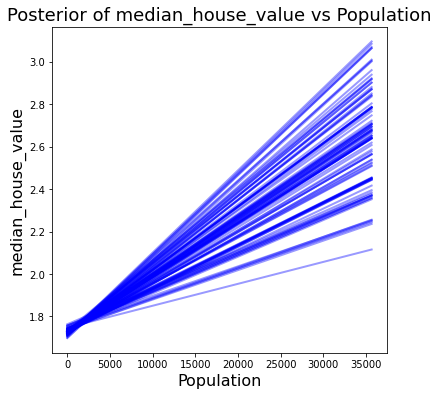

In [22]:
with model9:
    model_effect('Population', trace, new_df.drop('median_house_value', axis=1))

In [63]:
X_train['Population'].mean()
X_train[X_train['Population']>25000]['Population'].value_counts()

28566.0    1
35682.0    1
Name: Population, dtype: int64

/home/pt18419/.local/lib/python3.6/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


(3000, 4643)
0.6012921149063201


/home/pt18419/.local/lib/python3.6/site-packages/arviz/stats/stats.py:338: UserWarning: hpd will be deprecated Please replace hdi
  ("hpd will be deprecated " "Please replace hdi"),
/home/pt18419/.local/lib/python3.6/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


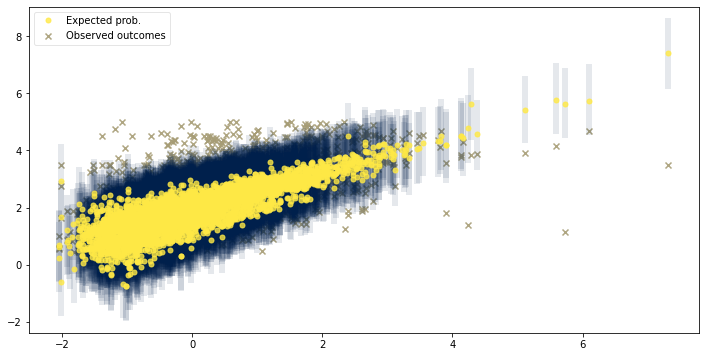

In [126]:
X_shared.set_value(X_std_test)
with model8:
    ppc = pm.sample_posterior_predictive(trace, samples=3000)
    y_pred = ppc['y']
    print(y_pred.shape)
    expected_y_pred = np.reshape(np.mean(y_pred, axis=0), [-1])
    mse = metrics.mean_squared_error(expected_y_pred, y_test)
    mse = np.sqrt(mse)
    print(mse)
    _, ax = plt.subplots(figsize=(12, 6))

    # uncertainty about the estimates:
    ax.plot(
        [X_std_test[:,0], X_std_test[:,0]],
        az.hpd(y_pred).T,
        lw=6,
        color="#00204C",
        alpha=0.1,
    )
    # expected probability of success:
    ax.plot(
        X_std_test[:,0],
        y_pred.mean(0),
        "o",
        ms=5,
        color="#FFE945",
        alpha=0.8,
        label="Expected prob.",
    )
    # actual outcomes:
    ax.scatter(
        x=X_std_test[:,0],
        y=y_test,
        marker="x",
        color="#A69C75",
        alpha=0.9,
        label="Observed outcomes",
    )
    ax.legend(fontsize=10, frameon=True, framealpha=0.5)

In [61]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_std, y_train)
y_pred = LR.predict(X_std_test)
LR.score(X_std_test, y_test)

0.5950389100191414

In [99]:
random_index = np.random.randint(5000)
intercept_sample, coeff1_sample, sigma_sample = trace['intercept'][random_index], trace['MedInc'][random_index], trace['sigma'][random_index]

0.6032416731347705


In [93]:
y_sample_mean = intercept_sample + coeff1_sample*X_std[:,0]
print(intercept_sample)


1.895431106933524


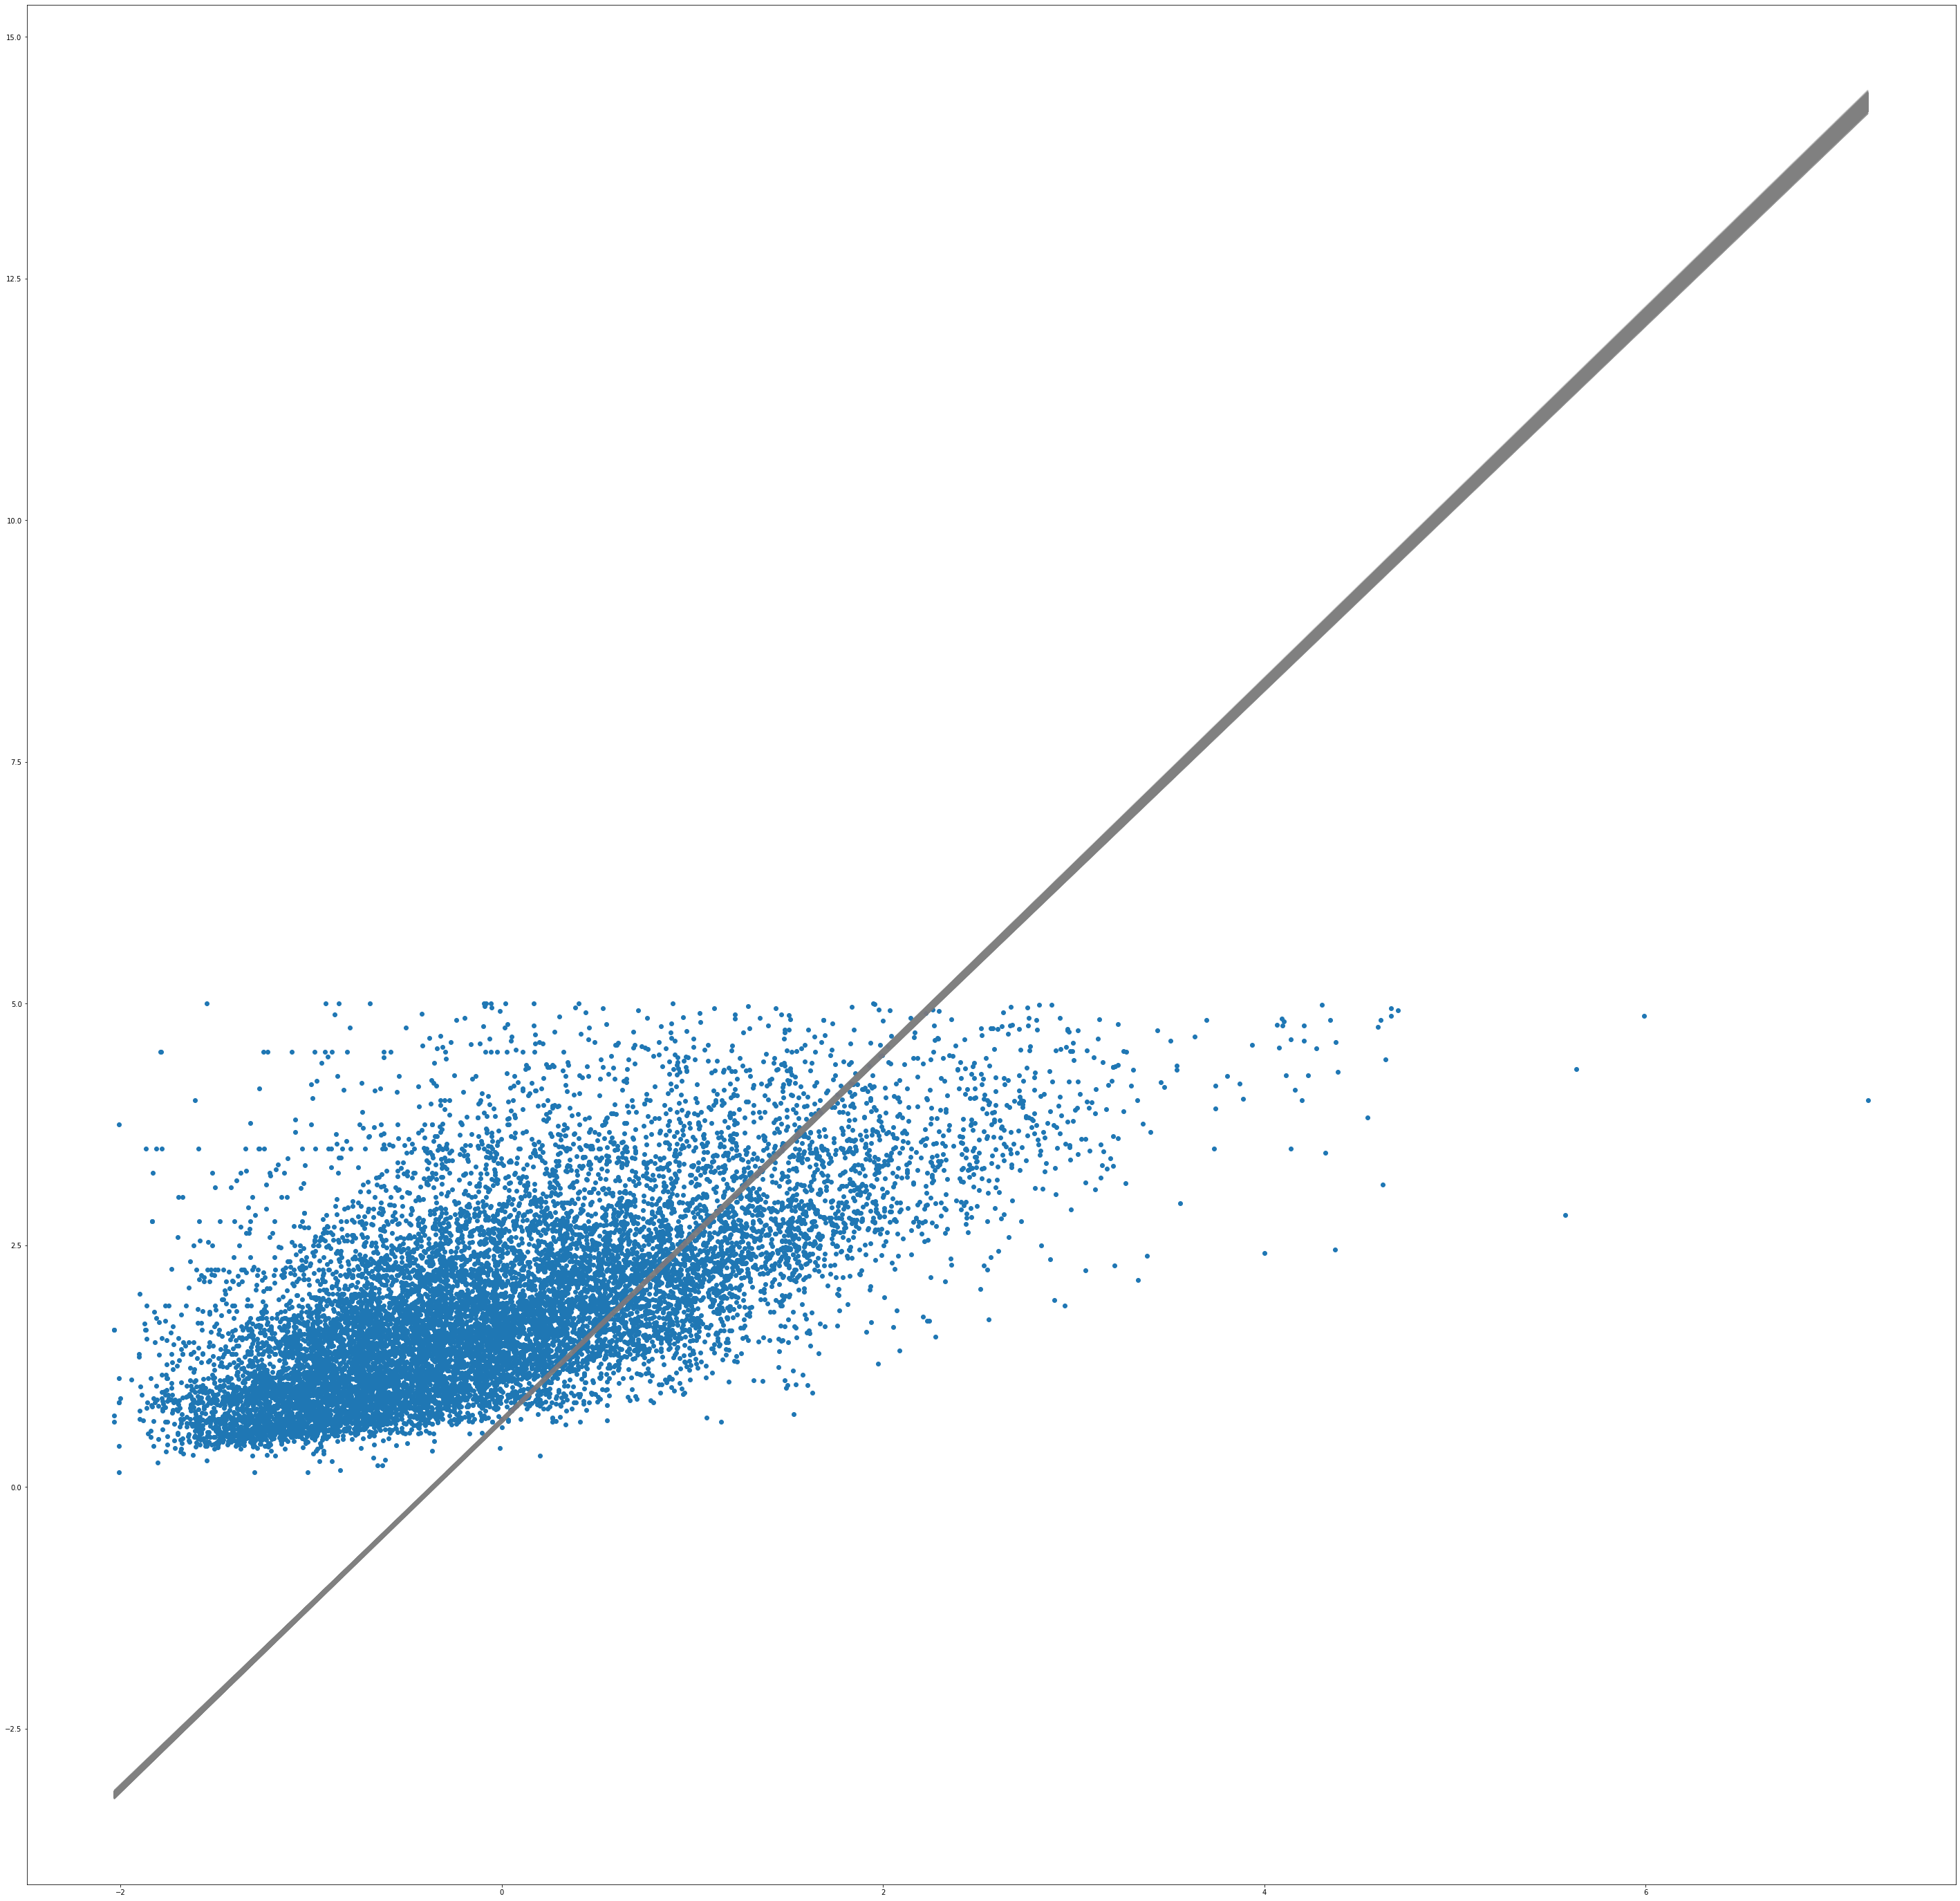

In [124]:
plt.figure(figsize=(50, 50))
plt.scatter(X_std[:,0], y_train)

for a_, b_ in zip(trace['intercept'], trace['MedInc']):
    plt.plot(X_std[:,0], a_*X_std[:,0] + b_, c='gray', alpha=0.1)
plt.show()